<a href="https://colab.research.google.com/github/vlasd45/web102/blob/main/%D0%B4%D0%B73.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-plot
import scikitplot as skplt

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn import datasets


In [6]:
hard_problem = datasets.make_classification(
    n_samples=100,
    n_features=100,
    n_informative=50,
    n_classes=3,
    n_redundant=50,
    n_clusters_per_class=1,
    random_state=42,
)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    *hard_problem,
    test_size=0.3,
    random_state=1,
)

In [ ]:
#Teaching model with K=8

In [13]:
clf = KNeighborsClassifier(n_neighbors=8)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [14]:
predictions = clf.predict(X_test)
accuracy_score(y_test, predictions)

0.6333333333333333

In [15]:
#Search optimal 'K'
accs = []
ks = range(1, 30)
for k in ks:
  clf = KNeighborsClassifier(n_neighbors=k)
  clf.fit(X_train, y_train)
  pred = clf.predict(X_test)
  acc = accuracy_score(y_test, pred)
  accs.append(acc)

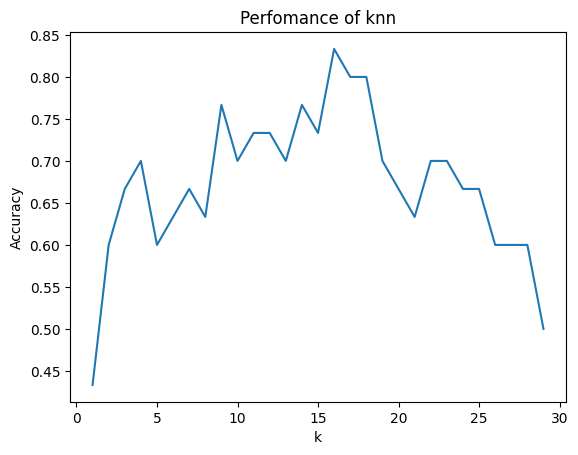

In [17]:
fig, ax = plt.subplots()
ax.plot(ks, accs)
ax.set(xlabel='k',
       ylabel='Accuracy',
       title='Perfomance of knn')
plt.show()

In [19]:
k_optim = 17

In [20]:
clf = KNeighborsClassifier(n_neighbors=k_optim)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=17)

In [21]:
y_pred = clf.predict(X_test)

In [25]:
#Calculate accuracy
#Validation model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy )

Accuracy: 0.8


In [33]:
print('Test accuracy: %.5f' % accuracy)

print('Good job!')

Test accuracy: 0.80000
Good job!


<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

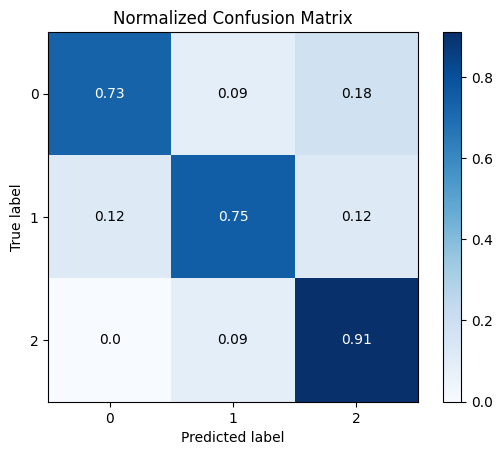

In [34]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize=True)

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.73      0.80        11
           1       0.75      0.75      0.75         8
           2       0.77      0.91      0.83        11

    accuracy                           0.80        30
   macro avg       0.80      0.80      0.79        30
weighted avg       0.81      0.80      0.80        30

